In [123]:
import pandas
import sys
import numpy as np
import statistics as stats

#Imports para calcular círculo a partir de tres puntos
from sympy import Eq
from sympy.geometry import Point, Circle

#Imports para dibujar un circulo
import matplotlib.pyplot as plt

import random as rd


# Parámetros: x,y del punto
class Punto(): 
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def print(self):
        print('(',self.x, ', ',self.y,')')
    def __repr__(self):
        return '(%s, %s)' % (self.x,self.y)
    def __str__(self):
        return '(%s, %s)' % (self.x,self.y)

# Parámetros: centro x,y, radio
class Circunferencia(): 
    def __init__(self, x, y, radio):
        self.centro = Punto(x,y)
        self.radio = radio
        
    def print(self):
        print('Centro: ',self.centro, ' Radio: ',self.radio)
    def __repr__(self):
        return 'Centro: %s Radio: %s' % (self.centro,self.radio)
    def __str__(self):
        return 'Centro: %s Radio: %s' % (self.centro,self.radio)
    
# Parámetros: circunferencia
class CircunferenciaConPuntos(): 
    def __init__(self,circunferencia):
        self.circunferencia = circunferencia
        self.puntos = []
        
    def anyadir_punto(self,punto):
        self.puntos.append(punto)
        
        
    def eliminar_punto(self,punto):
        self.puntos.remove(punto)
        
    def print(self):
        print('Circunferencia: ',self.circunferencia, ' Puntos: ',self.puntos)
    def __repr__(self):
        return 'Circunferencia: %s Puntos: %s' % (self.circunferencia,self.puntos)
    def __str__(self):
        return 'Circunferencia: %s Puntos: %s' % (self.circunferencia,self.puntos)
    
    
    
# Parámetros: Archivo CSV donde se encuentran los puntos
def leer_puntos(archivo_csv):
   
    puntoscsv = pandas.read_csv(archivo_csv, header=None, names=['x', 'y']).values
    puntos = []
    for i in range(len(puntoscsv)):
        puntos.append(Punto(puntoscsv[i][0],puntoscsv[i][1]))
        
    return puntos
    
# Parámetros: Circunferencia con Puntos
def dibujar_circunferencia_con_puntos(circunferenciaConPuntos):  # learningaboutelectronics.com/Articles/How-to-draw-a-circle-using-matplotlib-in-Python.php
    
    # Lista de colores con los que se representará las circunferencias con sus puntos asociados
    colores = ['red','blue','green','black','yellow','purple','cyan','pink','magenta','orange','brown']
    
    for i in range(len(circunferenciaConPuntos)):
       
        ccp = circunferenciaConPuntos[i]
        Xs = []
        Ys = []
        
        # Dibujamos los puntos asociados a la circunferencia
        for p in ccp.puntos:
            Xs.append(p.x)
            Ys.append(p.y)
        
        plt.plot(Xs, Ys, 'ro', color=colores[i])
        
        #Dibujamos la circunferencia
        plt.plot(ccp.circunferencia.centro.x, ccp.circunferencia.centro.y, 'ro', color=colores[i])
        circulo = plt.Circle((ccp.circunferencia.centro.x, ccp.circunferencia.centro.y), ccp.circunferencia.radio, color=colores[i], fill=False)
        ax=plt.gca()
        ax.add_patch(circulo)
        plt.axis('scaled')
    
    plt.show()
    
    
# Genera una circunferencia a partir de los 3 puntos pasados
# Parámetros: Array de 3 puntos
def obtener_circunferencia(puntos): # REF: codewars.com/kata/give-the-center-and-the-radius-of-circumscribed-circle-a-warm-up-challenge/python
    
    x1 = puntos[0].x
    x2 = puntos[1].x
    x3 = puntos[2].x
    y1 = puntos[0].y
    y2 = puntos[1].y
    y3 = puntos[2].y
    
    D = 2*(x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))
    
    if(D==0):
        puntosNuevos = [puntos[0], puntos[1]]
        distancia = np.sqrt(pow(x1-x2,2)+pow(y1-y2,2))
        x3 = x1 + distancia
        y3 = y1 + distancia
        puntoNuevo = Punto(x3,y3)
        puntosNuevos = [puntos[0], puntos[1], puntoNuevo]
        return obtener_circunferencia(puntosNuevos)
        
    Ux = ((pow(x1,2) + pow(y1,2)) * (y2-y3) + (pow(x2,2) + pow(y2,2)) * (y3-y1) + (pow(x3,2) + pow(y3,2)) * (y1-y2))/D
    Uy = ((pow(x1,2) + pow(y1,2)) * (x3-x2) + (pow(x2,2) + pow(y2,2)) * (x1-x3) + (pow(x3,2) + pow(y3,2)) * (x2-x1))/D
    AB = np.sqrt(float(pow(x2-x1,2) + pow(y2-y1,2)))
    BC = np.sqrt(float(pow(x3-x2,2) + pow(y3-y2,2)))
    AC = np.sqrt(float(pow(x3-x1,2) + pow(y3-y1,2)))
    diametro = (2*AB*BC*AC)/abs(D)
    
    circunferencia = Circunferencia(float(Ux),float(Uy),float(diametro/2))
    
    return circunferencia
    

# Crea n circunferencias iniciales al azar a partir de 3 puntos de la lista de todos los puntos.
# Parámetros: Array de todos los puntos, número de circunferencias totales
def obtener_circunferencias_iniciales(puntos,n_circunferencias): 
    
    circunferencias = []
    
    for i in range(n_circunferencias):
        
        puntosRandom = rd.sample(puntos,3)
        circunferencia = obtener_circunferencia(puntosRandom)
        circunferencias.append(circunferencia)
    
    return circunferencias
    
    
# Parámetros: Array de todos los puntos
def obtener_3_puntos_old(puntos):
    
    aux_x_max = float('-inf')
    aux_x_min = float('inf')
    aux_y_max = float('-inf')
    
    for i in range(len(puntos)):

        if(puntos[i].x >= aux_x_max):
            px_max = puntos[i]
            aux_x_max = puntos[i].x

        if(puntos[i].x <= aux_x_min):
            px_min = puntos[i]
            aux_x_min = puntos[i].x
    
    for i in range(len(puntos)):
        if((puntos[i].y >= aux_y_max) and (puntos[i] != px_max and puntos[i] != px_min)):
            py_max = puntos[i]
            aux_y_max = puntos[i].y        
    
    return px_max,px_min,py_max 

# Parámetros: Array de todos los puntos
def obtener_3_puntos(puntos):
    
    randomVals = rd.sample(puntos,3)
        
    return randomVals[0],randomVals[1],randomVals[2]


# Devuelve un array con los grados de pertenencia de un punto a todas las circunferencias
# Parámetros: punto al que queremos calcular los grados de pertenencia, array de todas las circunferencias
def grados_pertenencia(p,circunferencias):
    
    #Calculamos la distancia del punto a cada circunferencia
    distancias = []
    
    for i in range(len(circunferencias)):
        d = np.sqrt(pow(p.x - circunferencias[i].centro.x,2) + pow(p.y - circunferencias[i].centro.y,2))
        distancias.append(abs(d - circunferencias[i].radio))
    
    #Calculamos el grado de pertencia a cada circunferencia con la siguiente fórmula: 100/distancia^2
    pertenencias = []
    
    for i in range(len(circunferencias)):
        if(distancias[i]==0.0):
            per = 100.0
        else:
            per = 100/(pow(distancias[i],2))
        pertenencias.append(per)
        
    #Normalizamos
    suma = sum(pertenencias)
    pertenencias = np.divide(pertenencias,suma)
    
    return pertenencias



def obtener_circunferencias_con_puntos(circunferencias, puntos):
    
    circunferencias_con_puntos = []
    for circunferencia in circunferencias:
        circunferencias_con_puntos.append(CircunferenciaConPuntos(circunferencia))
    
    for p in puntos:
        gradosPert = grados_pertenencia(p,circunferencias)
        indice = np.where(gradosPert == max(gradosPert))
        circunferencias_con_puntos[indice[0][0]].anyadir_punto(p)
        
    
    
    return circunferencias_con_puntos



def comprobar_grado_pertenencia(circunferencias_con_puntos):
    
    circunferencias = []
    grados_por_cluster = []
    grados_por_punto = []
    i = 0
    
    for circunferencia_con_puntos in circunferencias_con_puntos:
        circunferencias.append(circunferencia_con_puntos.circunferencia)
        
    
    for circunferencia_con_puntos in circunferencias_con_puntos:
        for p in circunferencia_con_puntos.puntos:
            grados_por_punto.append(max(grados_pertenencia(p,circunferencias)))
           
        grados_por_cluster.append(min(grados_por_punto))
        
    return min(grados_por_cluster)




def obtener_siguientes_clusters(puntos, clusters_prev):
    
    clusters_post = []
    for cluster_prev in clusters_prev:
        
        puntos_cluster = cluster_prev.puntos
        if(len(puntos_cluster) < 3):
            print("ERROR 1")
            return "Menos de 3 puntos"
        
        clusters_post.append(obtener_circunferencia(obtener_3_puntos(puntos_cluster)))
    
    return obtener_circunferencias_con_puntos(clusters_post, puntos)



def clustering_circunferencias(puntos, clusters_prev, razon, max_iteraciones):
    
    iterar = 1
    iteraciones = 0;
    
    while(iterar and iteraciones <= max_iteraciones):
        
        diferencia = []
        clusters_post = obtener_siguientes_clusters(puntos, clusters_prev)
        if(clusters_post == "Menos de 3 puntos"):
            print("ERROR 2")
            return "Menos de 3 puntos";
        
        for i in range(len(clusters_prev)):
            
            prev_centro = clusters_prev[i].circunferencia.centro
            prev_radio = clusters_prev[i].circunferencia.radio
            post_centro = clusters_post[i].circunferencia.centro
            post_radio = clusters_post[i].circunferencia.radio
            
            diferencia.append(np.sqrt((prev_centro.x - post_centro.x)**2 + (prev_centro.y - post_centro.y)**2) + abs(prev_radio - post_radio))
            
        if(max(diferencia) < razon):    
            iterar = 0
            
        clusters_prev = clusters_post
        iteraciones = iteraciones + 1
        
        
    return clusters_post



def obtener_circunferencias_con_incertidumbre(puntos, n_circunferencias, min_grado_pertenencia, max_iteraciones_algoritmo, razon, max_iteraciones_clustering):
    
    iterar = 1
    n_iteraciones = 0
    
    while(iterar and n_iteraciones < max_iteraciones_algoritmo):
        
        circunferencias_iniciales = obtener_circunferencias_iniciales(puntos, n_circunferencias)
        circunferencias_con_puntos_iniciales = obtener_circunferencias_con_puntos(circunferencias_iniciales, puntos)
        
        circunferencias_con_puntos_finales = clustering_circunferencias(puntos, circunferencias_con_puntos_iniciales, razon, max_iteraciones_clustering)
        if(circunferencias_con_puntos_finales == "Menos de 3 puntos"):
            print("ERROR 3")
            continue
        
        if(comprobar_grado_pertenencia(circunferencias_con_puntos_finales) > min_grado_pertenencia):
            iterar = 0
            
        n_iteraciones = n_iteraciones + 1
        
        
    return circunferencias_con_puntos_finales

ERROR 1
ERROR 2
ERROR 3


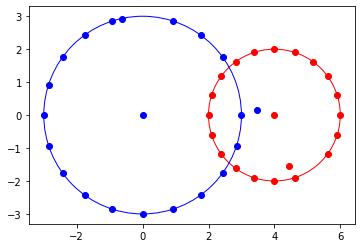

In [130]:
puntos = leer_puntos('Data/puntos_aleatorios.csv')

num_circunferencias = 2
min_grado_pertenencia = 0.95 
max_iteraciones_algoritmo = 500
razon = 0.01
max_iteraciones_clustering = 10

circunferencias_con_puntos = obtener_circunferencias_con_incertidumbre(puntos,num_circunferencias, min_grado_pertenencia, max_iteraciones_algoritmo, razon, max_iteraciones_clustering)

dibujar_circunferencia_con_puntos(circunferencias_con_puntos)